In [22]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [23]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GOOG.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Date         Open         High  ...        Close    Adj Close   Volume
0    2020-05-19  1386.996948  1392.000000  ...  1373.484985  1373.484985  1280600
1    2020-05-20  1389.579956  1410.420044  ...  1406.719971  1406.719971  1655400
2    2020-05-21  1408.000000  1415.489990  ...  1402.800049  1402.800049  1385000
3    2020-05-22  1396.709961  1412.760010  ...  1410.420044  1410.420044  1309400
4    2020-05-26  1437.270020  1441.000000  ...  1417.020020  1417.020020  2060600
..          ...          ...          ...  ...          ...          ...      ...
247  2021-05-12  2261.709961  2285.370117  ...  2239.080078  2239.080078  1746700
248  2021-05-13  2261.090088  2276.601074  ...  2261.969971  2261.969971  1333500
249  2021-05-14  2291.830078  2321.139893  ...  2316.159912  2316.159912  1330100
250  2021-05-17  2309.320068  2323.340088  ...  2321.409912  2321.409912   992100
251  2021-05-18  2336.906006  2343.149902  ...  2303.429932  2303.429932   864400

[252 rows x 7 columns]

In [24]:
actual_price = df.tail(1)
actual_price

Date         Open         High  ...        Close    Adj Close  Volume
251  2021-05-18  2336.906006  2343.149902  ...  2303.429932  2303.429932  864400

[1 rows x 7 columns]

In [25]:
df = df.head(len(df)-1)
df

Date         Open         High  ...        Close    Adj Close   Volume
0    2020-05-19  1386.996948  1392.000000  ...  1373.484985  1373.484985  1280600
1    2020-05-20  1389.579956  1410.420044  ...  1406.719971  1406.719971  1655400
2    2020-05-21  1408.000000  1415.489990  ...  1402.800049  1402.800049  1385000
3    2020-05-22  1396.709961  1412.760010  ...  1410.420044  1410.420044  1309400
4    2020-05-26  1437.270020  1441.000000  ...  1417.020020  1417.020020  2060600
..          ...          ...          ...  ...          ...          ...      ...
246  2021-05-11  2291.860107  2322.000000  ...  2308.760010  2308.760010  1605500
247  2021-05-12  2261.709961  2285.370117  ...  2239.080078  2239.080078  1746700
248  2021-05-13  2261.090088  2276.601074  ...  2261.969971  2261.969971  1333500
249  2021-05-14  2291.830078  2321.139893  ...  2316.159912  2316.159912  1330100
250  2021-05-17  2309.320068  2323.340088  ...  2321.409912  2321.409912   992100

[251 rows x 7 columns]

In [26]:
days = list()
adj_close_prices = list()

In [27]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [28]:
days = list()
adj_close_prices = list()

for i in range(len(df_days)):
   days.append([i])

for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )
days

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138]

In [29]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

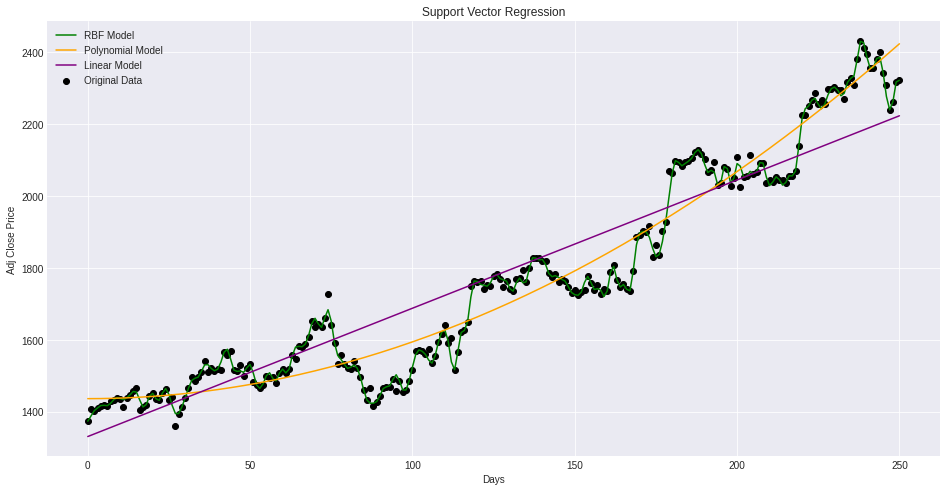

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [31]:
# change x in day = [[x]] to the day you want to predict
day = [[251]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2222.06795791]
The Linear SVR predicted: [2226.11800301]
The Polynomial SVR predicted: [2430.56490226]
